In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [18]:
x=df.iloc[:,1:3]
y=df.iloc[:,0:1]

In [22]:
x['Age_impute']=x['Age']


In [23]:
x.isnull().sum()

Age           177
Fare            0
Age_impute    177
dtype: int64

In [29]:
x['Age_impute'][x['Age_impute'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age_impute, Length: 177, dtype: float64

In [38]:
x['Age'].dropna().sample(x['Age'].isnull().sum()).values

array([29.  , 39.  , 21.  ,  5.  , 28.  , 22.  , 42.  ,  0.67, 54.  ,
       30.  ,  2.  , 21.  , 34.  ,  4.  ,  2.  , 30.  , 45.  , 27.  ,
       45.  , 64.  , 63.  , 32.  , 71.  , 28.  , 22.  , 62.  , 14.5 ,
       33.  , 42.  , 40.5 , 51.  , 35.  , 19.  , 36.  , 49.  , 11.  ,
       60.  , 24.  , 28.  , 39.  , 12.  , 50.  , 34.  , 25.  ,  3.  ,
       16.  , 29.  , 18.  , 27.  , 31.  , 39.  , 50.  , 56.  , 29.  ,
       29.  ,  1.  , 54.  , 42.  , 17.  , 30.  , 52.  , 33.  ,  6.  ,
       22.  , 45.  , 35.  ,  7.  , 13.  , 25.  , 29.  , 39.  , 33.  ,
       58.  , 19.  , 21.  , 24.  , 22.  , 16.  , 28.  , 21.  , 11.  ,
       31.  , 30.  , 24.  , 22.  , 44.  , 34.  , 30.5 , 32.  , 18.  ,
       17.  , 47.  , 18.  , 24.  , 21.  , 17.  ,  9.  , 44.  , 24.  ,
       48.  , 30.  , 42.  , 25.  , 29.  , 51.  , 25.  , 21.  , 24.  ,
       22.  ,  4.  , 14.  , 49.  , 19.  , 15.  ,  7.  , 27.  , 33.  ,
       36.  , 35.  , 34.  , 20.  , 22.  , 22.  , 35.  , 51.  , 31.  ,
       55.  , 18.  ,

In [39]:
x['Age_impute'][x['Age_impute'].isnull()]=x['Age'].dropna().sample(x['Age'].isnull().sum()).values

In [40]:
x.isnull().sum()

Age           177
Fare            0
Age_impute      0
dtype: int64

In [41]:
x

,Age,Fare,Age_impute
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0
...,...,...,...
886,27.0,13.0000,27.0
887,19.0,30.0000,19.0
888,NaN,23.4500,66.0
889,26.0,30.0000,26.0


C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\1419127593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age'],label='orginal',hist=False)
C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\1419127593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age_impute'],lab

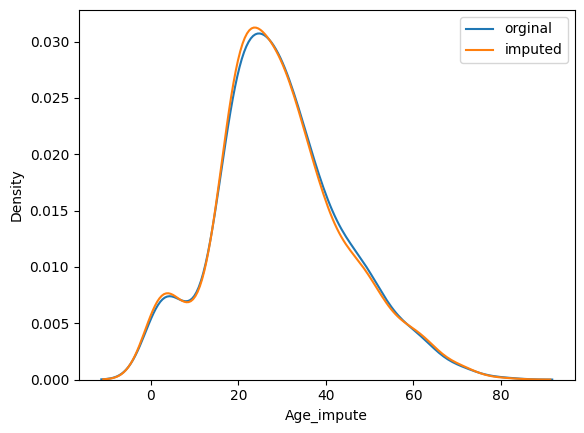

In [47]:
sns.distplot(x['Age'],label='orginal',hist=False)
sns.distplot(x['Age_impute'],label='imputed',hist=False)
plt.legend()
plt.show()

In [48]:
x.cov()

,Age,Fare,Age_impute
Age,211.019125,73.849030,211.019125
Fare,73.849030,2469.436846,61.485644
Age_impute,211.019125,61.485644,213.473009


In [49]:
x.corr()

,Age,Fare,Age_impute
Age,1.000000,0.096067,1.000000
Fare,0.096067,1.000000,0.084684
Age_impute,1.000000,0.084684,1.000000


<Axes: >

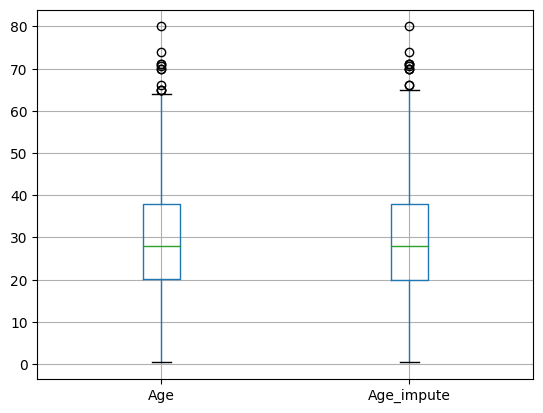

In [52]:
x[['Age','Age_impute']].boxplot()

In [58]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\house_socity_price.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [60]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='FireplaceQu'>

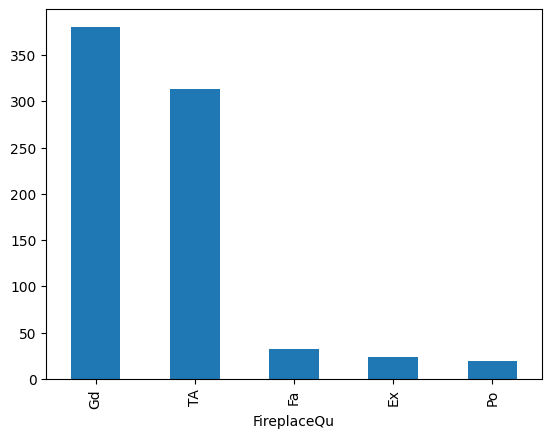

In [62]:
df['FireplaceQu'].value_counts().plot(kind='bar')

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

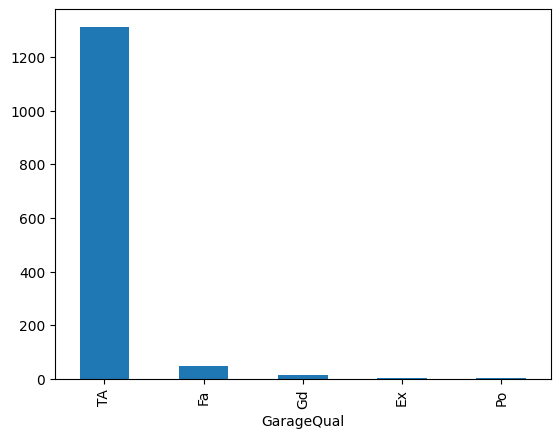

In [66]:
df['GarageQual'].value_counts().plot(kind='bar')
df['GarageQual'].value_counts()

In [71]:
x=df.drop(columns=['SalePrice'])
y=df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [75]:
x['imputed_FireplaceQu']=x['FireplaceQu']
x['imputed_GarageQual']=x['GarageQual']
x

,FireplaceQu,GarageQual,imputed_FireplaceQu,imputed_GarageQual
0,NaN,TA,NaN,TA
1,TA,TA,TA,TA
2,TA,TA,TA,TA
3,Gd,TA,Gd,TA
4,TA,TA,TA,TA
...,...,...,...,...
1455,TA,TA,TA,TA
1456,TA,TA,TA,TA
1457,Gd,TA,Gd,TA
1458,NaN,TA,NaN,TA


In [81]:
x['imputed_GarageQual'][x['imputed_GarageQual'].isnull()]=x['GarageQual'].dropna().sample(x['GarageQual'].isnull().sum()).values

In [83]:
x.isnull().sum()

FireplaceQu            690
GarageQual              81
imputed_FireplaceQu    690
imputed_GarageQual       0
dtype: int64

In [85]:
x['imputed_FireplaceQu'][x['imputed_FireplaceQu'].isnull()]=x['FireplaceQu'].dropna().sample(x['FireplaceQu'].isnull().sum()).values

In [87]:
x.isnull().sum()

FireplaceQu            690
GarageQual              81
imputed_FireplaceQu      0
imputed_GarageQual       0
dtype: int64

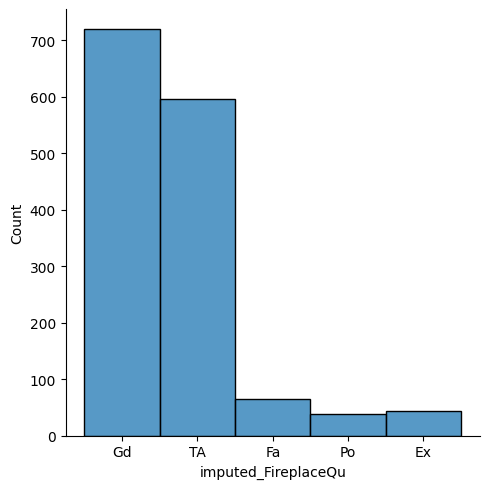

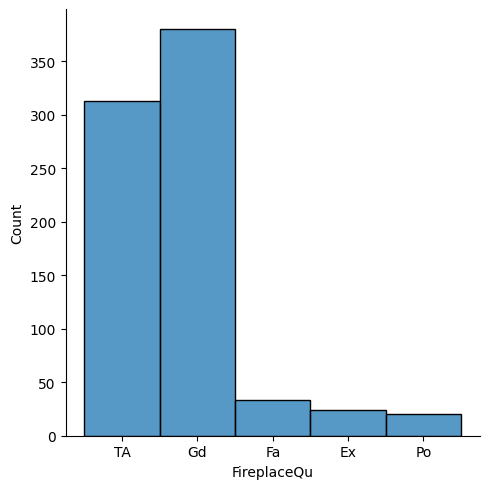

In [95]:
sns.displot(x['imputed_FireplaceQu'])
sns.displot(x['FireplaceQu'])

In [104]:
df=pd.concat([x,y],axis=1)
df

,FireplaceQu,GarageQual,imputed_FireplaceQu,imputed_GarageQual,SalePrice
0,NaN,TA,Gd,TA,208500
1,TA,TA,TA,TA,181500
2,TA,TA,TA,TA,223500
3,Gd,TA,Gd,TA,140000
4,TA,TA,TA,TA,250000
...,...,...,...,...,...
1455,TA,TA,TA,TA,175000
1456,TA,TA,TA,TA,210000
1457,Gd,TA,Gd,TA,266500
1458,NaN,TA,Gd,TA,142125


C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\1074183780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['GarageQual']==catagori]['SalePrice'],hist=False,label=catagori)
C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\1074183780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



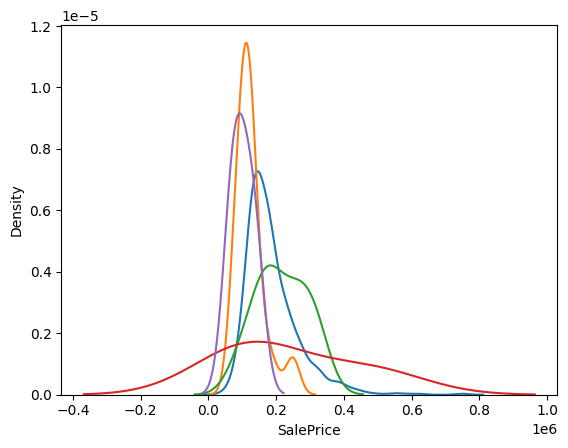

In [102]:
for catagori in df['GarageQual'].dropna().unique():
    sns.distplot(df[df['GarageQual']==catagori]['SalePrice'],hist=False,label=catagori)

plt.show()

C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\3750593483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['imputed_GarageQual'] == category]['SalePrice'],hist=False,label=category)
C:\Users\SDS\AppData\Local\Temp\ipykernel_16772\3750593483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

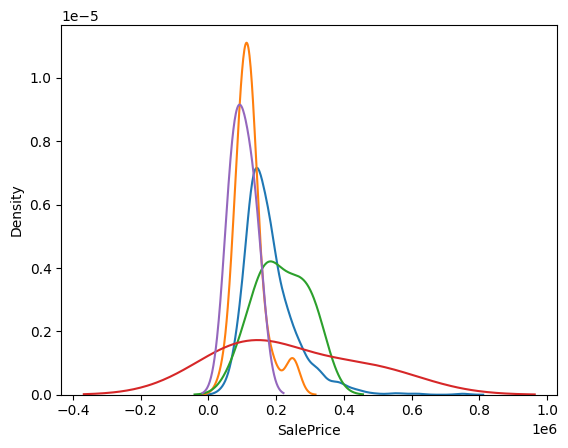

In [105]:
for category in df['imputed_GarageQual'].dropna().unique():
    sns.distplot(df[df['imputed_GarageQual'] == category]['SalePrice'],hist=False,label=category)
plt.show()